In [1]:
!pip install git+https://github.com/AAMIASoftwares-research/HCATNetwork.git@google-colab
!pip install git+https://github.com/AAMIASoftwares-research/DatasetUtilities.git@google-colab

  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-c4tq2mb5
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commit e94413cce5e4fad1a00a771112bf7e66e3501d4d
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-c4tq2mb5'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


  Cloning https://github.com/AAMIASoftwares-research/DatasetUtilities.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-n1pbmjba
  Resolved https://github.com/AAMIASoftwares-research/DatasetUtilities.git to commit abbffcb17dc017057ea1db6c361aecba70cf76f5
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-install-47sp4trn\hcatnetwork_eccba5c39f58486384db89a7526eec77
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commi

  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/DatasetUtilities.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-n1pbmjba'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'
  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-install-47sp4trn\hcatnetwork_eccba5c39f58486384db89a7526eec77'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


In [2]:
import hcatnetwork
import HearticDatasetManager
import networkx

In [3]:
import os
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
# import graph annotations
from HearticDatasetManager.cat08.dataset import DATASET_CAT08_GRAPHS_RESAMPLED_05MM
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT
# import images
from HearticDatasetManager.asoca import AsocaImageCT
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_IMAGES_DICT
from HearticDatasetManager.cat08 import Cat08ImageCT
from HearticDatasetManager.cat08.dataset import DATASET_CAT08_IMAGES

In [5]:
# data paths
#cat08_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/CAT08"
asoca_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/ASOCA"

In [6]:
# image from ASOCA
asoca_image_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_IMAGES_DICT["Normal"][0]
)

image_asoca = AsocaImageCT(asoca_image_file)
# print voxel spacing
print(image_asoca.spacing)

[0.416016 0.416016 0.625   ]


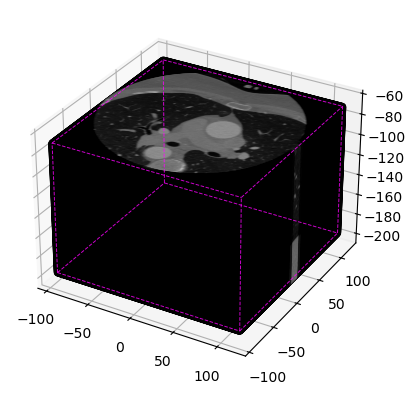

In [10]:
#resample images to have the same voxel spacing for all images across the dataset

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})

xl, yl, zl = image_asoca.bounding_box.get_xlim(), image_asoca.bounding_box.get_ylim(), image_asoca.bounding_box.get_zlim()
xl_min = xl[0]
xl_max = xl[1]
yl_min = yl[0]
yl_max = yl[1]
zl_min = zl[0]
zl_max = zl[1]

ax.set_xlim([xl_min-10, xl_max+10])
ax.set_ylim([yl_min-10, yl_max+10])
ax.set_zlim([zl_min-10, zl_max+10])
ax.add_artist(image_asoca.bounding_box.get_artist())
points_to_sample = []
for zs in np.arange(zl_min,zl_max,0.5):
    for xs in np.arange(xl_min,xl_max,0.5):
        for ys in np.arange(yl_min,yl_max,0.5):
            points_to_sample.append([xs, ys, zs])
points_to_sample = numpy.array(points_to_sample)
samples = image_asoca.sample(points_to_sample.T, interpolation="linear")
ax.scatter(points_to_sample[:,0], points_to_sample[:,1], points_to_sample[:,2], c=samples, cmap="gray")
plt.show()

In [11]:
# the np.array is now flattened 
samples.shape

(46094904,)

In [12]:
# reshape the array to its new size
# new_pixel_x = (old_pixel_x*old_spacing_x)/new_spacing
# new_pixel_y = (old_pixel_y*old_spacing_y)/new_spacing
# new_pixel_z = (old_pixel_z*old_spacing_z)/new_spacing
samples = np.reshape(samples,(426,426,254))
samples.shape

(426, 426, 254)

In [13]:
# replace data in image definition
image_asoca.data = samples
image_asoca.data.shape

(426, 426, 254)

In [14]:
#replace spacing in image definition 
image_asoca.spacing=[0.5,0.5,0.5]

In [15]:
# replace shape in image definition
image_asoca.shape = [426,426,254]

In [16]:
# get new voxel coordinates
coords_new = image_asoca.get_data_coordinates_grid()

In [17]:
# the first three values are the x,y,z cooridnates while the fourth value correpsonds to the voxel intensity
coords_new

array([[[[ 1.16800003e+02,  1.20000000e+02, -1.96875000e+02,
          -1.02400000e+03],
         [ 1.16800003e+02,  1.20000000e+02, -1.96250000e+02,
          -1.02400000e+03],
         [ 1.16800003e+02,  1.20000000e+02, -1.95625000e+02,
          -1.02400000e+03],
         ...,
         [ 1.16800003e+02,  1.20000000e+02, -4.00000000e+01,
          -1.02400000e+03],
         [ 1.16800003e+02,  1.20000000e+02, -3.93750000e+01,
          -1.02400000e+03],
         [ 1.16800003e+02,  1.20000000e+02, -3.87500000e+01,
          -1.02400000e+03]],

        [[ 1.16800003e+02,  1.19583984e+02, -1.96875000e+02,
          -1.02400000e+03],
         [ 1.16800003e+02,  1.19583984e+02, -1.96250000e+02,
          -1.02400000e+03],
         [ 1.16800003e+02,  1.19583984e+02, -1.95625000e+02,
          -1.02400000e+03],
         ...,
         [ 1.16800003e+02,  1.19583984e+02, -4.00000000e+01,
          -1.02400000e+03],
         [ 1.16800003e+02,  1.19583984e+02, -3.93750000e+01,
          -1.024000

In [18]:
# now perform graph transformation to RAS coordinates 
# load graph
asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT["Normal"][0]
)

graph_asoca = hcatnetwork.io.load_graph(
    file_path=asoca_graph_file,
    output_type=hcatnetwork.graph.SimpleCenterlineGraph
)

pts = []
for i, v in enumerate(graph_asoca.nodes.values()):
    pts.append([v["x"],v["y"],v["z"],v['topology']])

pts = numpy.array(pts)

In [19]:
# need to remove the topology to apply transform
pts_no_top = np.array([subarray[:-1] for subarray in pts])

In [20]:
image_asoca

ImageCT(ASOCA/Normal_1, data of shape (426, 426, 254), origin (mm) [ 116.80000305  120.         -196.875     ], spacing (mm) [0.5, 0.5, 0.5], bounding box BoundingBoxDict(lower: [ -95.7841793   -92.58418235 -196.875     ], upper: [116.80000305 120.         -70.        ]))

In [21]:
# apply transform to graph/image 
from HearticDatasetManager.affine import apply_affine_3d

transform = image_asoca.affine_centerlines2ras
pts_no_top = apply_affine_3d(transform, pts_no_top.T).T

In [22]:
# now add again the topology information
pts_no_top = np.concatenate((pts_no_top, pts[:, -1][:, np.newaxis]), axis=1)
pts_no_top.shape

(1287, 4)

In [23]:
# list of indexes with ostium points
ls=[850,868]
pts_no_top[ls]

array([[13.183456420898438, -1.388641357421875, -93.45762634277344,
        <ArteryNodeTopology.OSTIUM: 1>],
       [20.466461181640625, 28.725494384765625, -104.70037841796875,
        <ArteryNodeTopology.OSTIUM: 1>]], dtype=object)

In [24]:
pts_no_top.shape

(1287, 4)

In [27]:
# save image and coordinates computed so far
import pickle

# save all preprocessed data and the corresponding labels
PATH = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/MY_ASOCA/"
asoca_img_0 = PATH + 'asoca_img_0_lin'
coord_asoca_img_0 = PATH + 'coord_asoca_img_0_lin'

with open(asoca_img_0, 'wb') as file:
    pickle.dump(image_asoca, file)
    
with open(coord_asoca_img_0, 'wb') as file:
    pickle.dump(coords_new, file)

In [20]:
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))


download_file('/kaggle/working/asoca_img_0','asoca_img_0_lin')
download_file('/kaggle/working/coord_asoca_img_0','coord_asoca_img_0_lin')

/kaggle/working/asoca_img_0_lin.zip

/kaggle/working/coord_asoca_img_0_lin.zip

In [42]:
pts_no_top.shape

(1287, 4)

In [43]:
# need to remove the topology to plot
pts_no_top = np.array([subarray[:-1] for subarray in pts])

In [ ]:
#resample images to have the same voxel spacing for all images across the dataset

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})

ax.set_xlim([xl_min-10, xl_max+10])
ax.set_ylim([yl_min-10, yl_max+10])
ax.set_zlim([zl_min-10, zl_max+10])
ax.add_artist(image_asoca.bounding_box.get_artist())

ax.scatter(points_to_sample[:,0], points_to_sample[:,1], points_to_sample[:,2], c=samples, cmap="gray", alpha=0.001)
ax.scatter(pts_no_top[:,0], pts_no_top[:,1], pts_no_top[:,2], c='r')
plt.show()